In [14]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import pingouin as pg
import nibabel as nii
import numpy as np 

In [15]:
df = pd.read_csv("sym_results_invsymloss_volume_v2.csv")
df=df[df.columns[1:]]
#display(df["struct"].unique())
display(df["method"].unique())
#df=df[~df["method"].isin(['Pair-zero-mean'])]
#df=df[df["method"].isin(["Affine","Pair","OP"])]
#df=df[~df["method"].isin(['Pair-zero-mean',"Pair-aug",'SyN'])]
#df=df[~df["struct"].isin(["bs","bg","th","cb","str","hpf","hy"])]
#df=df[~df["struct"].isin(["bs","bg"])]
#df=df[~df["mouse"].isin(["M877"])]
#df=df[~df["target"].isin(["M877"])]
#df=df[df['mouse'] == df['target']]

#display(df["struct"].unique())
display(df["method"].unique())


df["loss"]=df["loss"].apply(lambda x : float(x))
df.sort_values("loss")


array(['SyN', 'SyN-Mask', 'SyN-Mean', 'DL-IRIS-sym', 'OP-sym', 'Pair-sym'],
      dtype=object)

array(['SyN', 'SyN-Mask', 'SyN-Mean', 'DL-IRIS-sym', 'OP-sym', 'Pair-sym'],
      dtype=object)

,method,mouse,loss
23,SyN,M875,0.000017
72,SyN-Mean,M857,0.000017
16,SyN,M672,0.000017
18,SyN,M857,0.000019
74,SyN-Mean,M867,0.000019
...,...,...,...
143,Pair-sym,665,0.128631
149,Pair-sym,680,0.134896
138,Pair-sym,660,0.140778
147,Pair-sym,675,0.147472


In [16]:
dfVolumeAvg=df.groupby(["struct"]).agg({"volume" : ['mean','std']})
dfVolumeAvg.columns = dfVolumeAvg.columns.map('_'.join).str.strip('_')

#dfVolumeAvg.columns = dfVolumeAvg.columns.droplevel(0)
dfVolumeAvg=dfVolumeAvg.reset_index()
dfVolumeAvg

KeyError: 'struct'

In [26]:
dfMouseAvg=df.groupby(["method"]).agg({"loss" : ['mean','std']})
dfMouseAvg.columns = dfMouseAvg.columns.map('_'.join).str.strip('_')

#dfMouseAvg.columns = dfMouseAvg.columns.droplevel(0)
dfMouseAvg=dfMouseAvg.reset_index()
dfMouseAvg.round(4)

,method,loss_mean,loss_std
0,DL-IRIS-sym,0.0031,0.0004
1,OP-sym,0.0463,0.0042
2,Pair-sym,0.0988,0.0449
3,SyN,0.0000,0.0000
4,SyN-Mask,0.0000,0.0000
5,SyN-Mean,0.0000,0.0000


In [18]:

plt.figure(figsize=(20,5))
sns.boxplot(data=df,x="struct",y="dice", hue="method")



ValueError: Could not interpret value `struct` for `x`. An entry with this name does not appear in `data`.

<Figure size 1440x360 with 0 Axes>

In [21]:
dfpivotMean=dfMouseAvg.pivot(index='method', columns='struct',values="dice_mean")
dfpivotMean

KeyError: 'struct'

In [22]:
methodRanking=100*dfpivotMean.mean(axis=1)
methodRanking

NameError: name 'dfpivotMean' is not defined

In [23]:
dfpivotStd=100*dfMouseAvg.pivot(index='method', columns='struct',values="dice_std")
dfpivotStd

KeyError: 'struct'

In [24]:
methodRanking=dfpivotStd.mean(axis=1)
methodRanking

NameError: name 'dfpivotStd' is not defined

In [25]:
structRanking=dfpivotMean.mean(axis=0).sort_values()
structRanking

NameError: name 'dfpivotMean' is not defined

In [64]:
structRankingByVariance=dfpivotMean.std(axis=0).sort_values()
structRankingByVariance

struct
th     0.009143
hpf    0.012286
str    0.014954
cb     0.014977
hy     0.018108
mb     0.020844
gp     0.022194
ctx    0.031988
olf    0.037460
dtype: float64

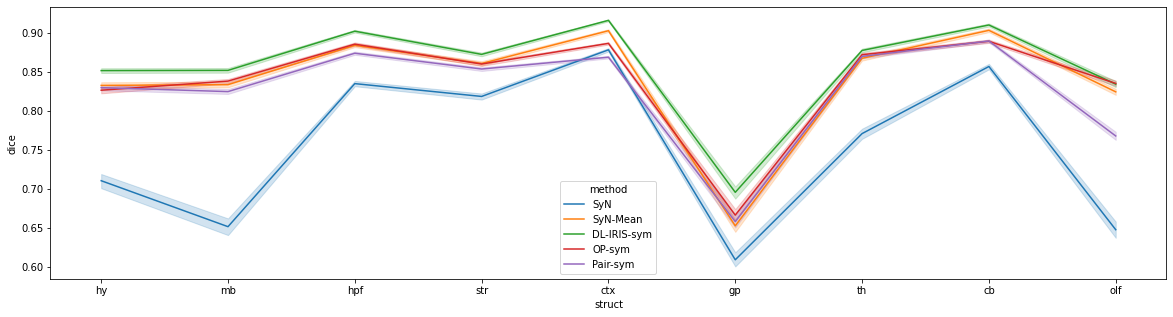

In [34]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x="struct",y="dice", hue="method")
plt.savefig("ranking.png")

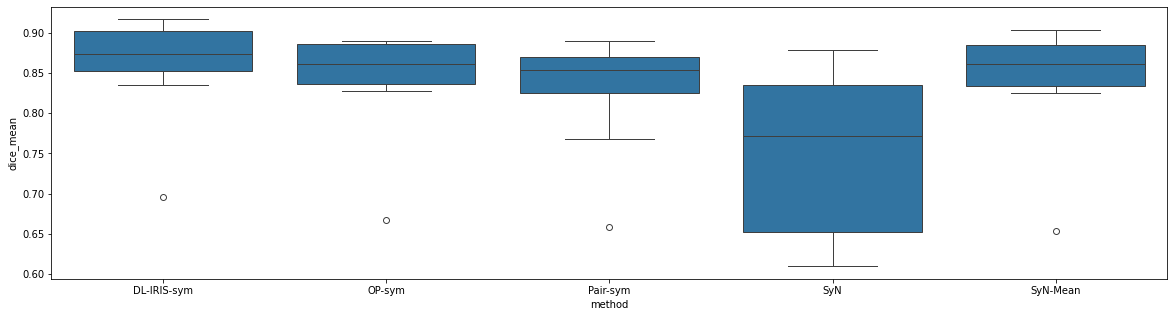

In [35]:
plt.figure(figsize=(20,5))
sns.boxplot(data=dfMouseAvg, x="method",y="dice_mean", order=methodRanking.index )
plt.savefig("ranking2.png")

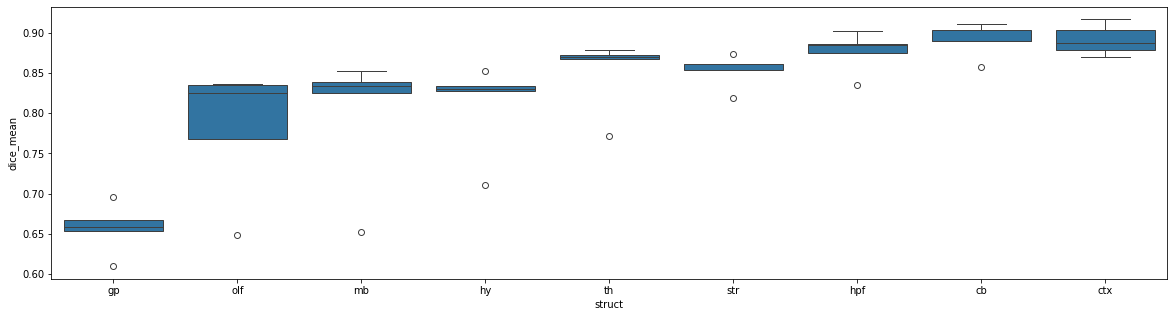

In [36]:
plt.figure(figsize=(20,5))
sns.boxplot(data=dfMouseAvg, x="struct",y="dice_mean", order=structRanking.index)
plt.savefig("ranking3.png")

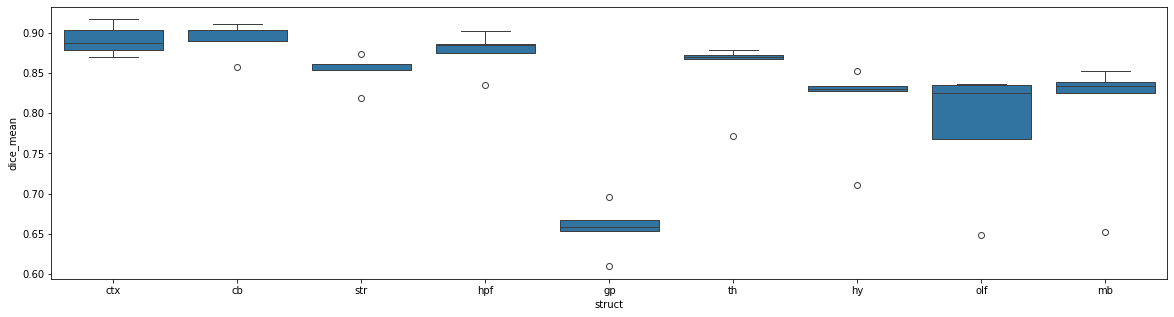

In [37]:
plt.figure(figsize=(20,5))
sns.boxplot(data=dfMouseAvg, x="struct",y="dice_mean", order=structRankingByVariance.index)
plt.savefig("ranking3bis.png")

gp : petite structure / peu contrasté => difficile à segmenter

olf : sensible au fied of view => grand variabilité morpho / pb de crop

mb : structure peu contrasté / mal définiee ?

hy : inferior : pb RSN / biais / variabilté FOV / decoupe


ctx / str / hpf / cb / th

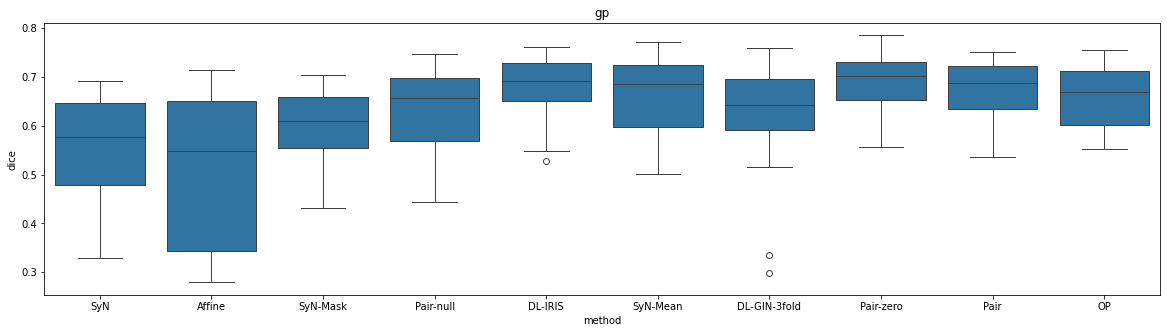

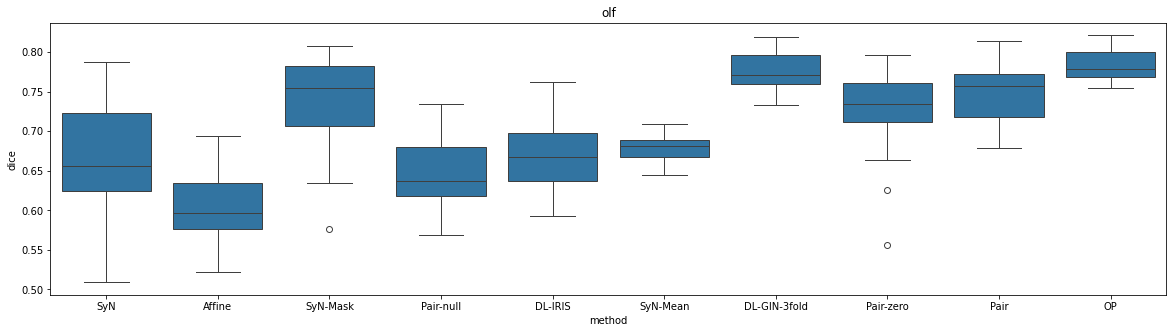

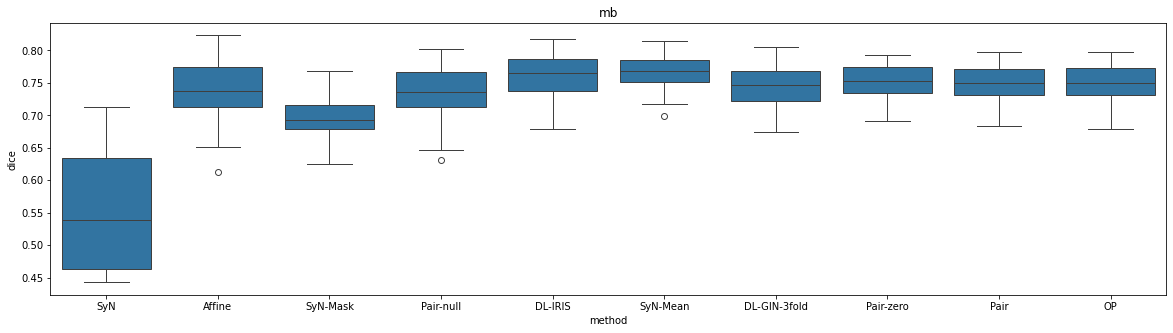

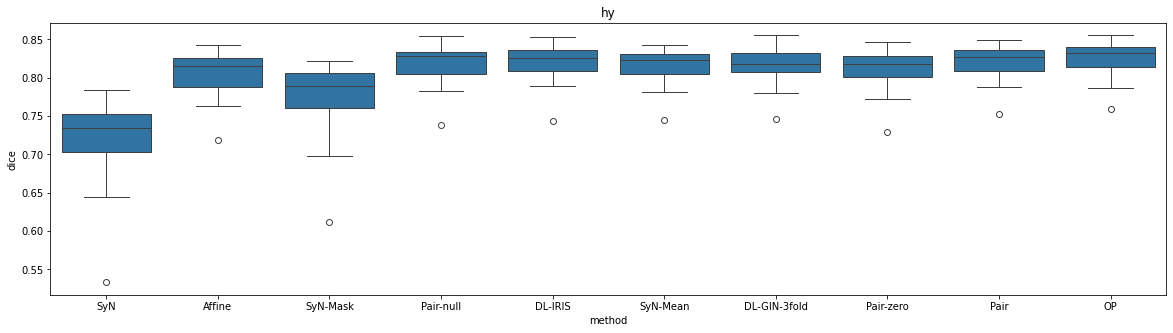

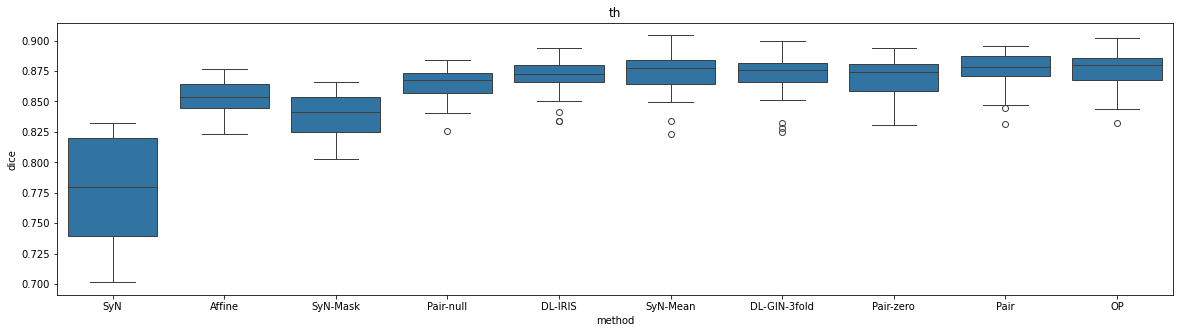

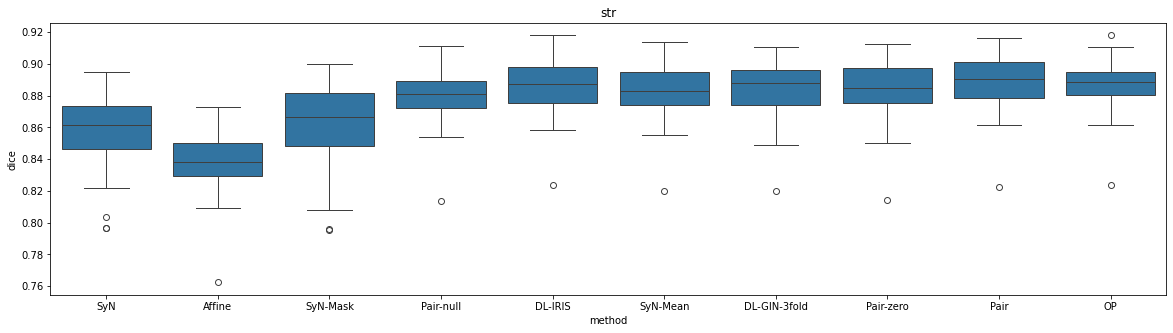

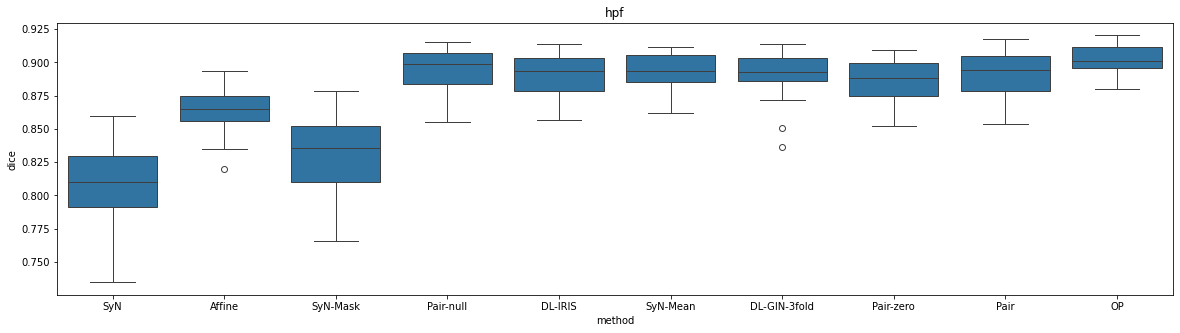

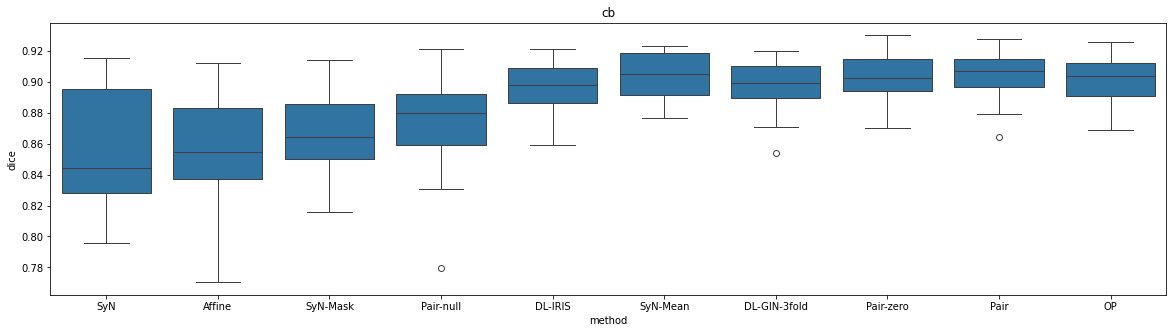

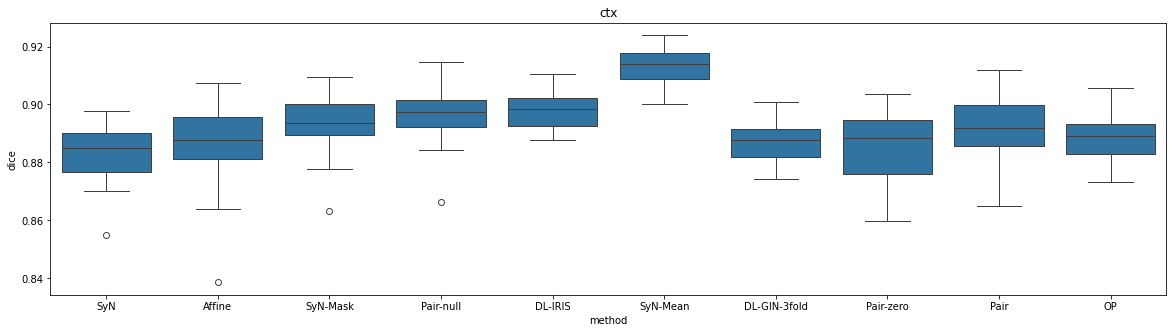

In [13]:
for item in structRanking.index :
    plt.figure(figsize=(20,5))
    sns.boxplot(data=df[df["struct"]==item], x="method",y="dice", order=methodRanking.index )
    plt.title(item)
    plt.show()

In [14]:
from statannotations.Annotator import Annotator
for item in structRanking.index :
    plt.figure(figsize=(20,5))
    ax=sns.boxplot(data=df[df["struct"]==item], x="method",y="dice", order=methodRanking.index )
    plt.title(item)
    pairs=[("Pair","OP"),("Pair","Pair-zero"),('DL-GIN-3fold','DL-IRIS'),('DL-GIN-3fold','OP'),("Pair-null","Pair-zero"),("Pair-null","SyN-Mean"),("OP","SyN-Mean")]
    annotator = Annotator(ax, pairs, data=df[df["struct"]==item], x="method",y="dice", order=methodRanking.index.tolist() )
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
    annotator.apply_and_annotate()
    plt.show()

ModuleNotFoundError: No module named 'statannotations'

In [15]:
.tolist()

SyntaxError: invalid syntax (1670580818.py, line 1)

In [16]:
methodRanking.index.tolist()

['SyN',
 'Affine',
 'SyN-Mask',
 'Pair-null',
 'DL-IRIS',
 'SyN-Mean',
 'DL-GIN-3fold',
 'Pair-zero',
 'Pair',
 'OP']

In [17]:
df.pivot(index='method', columns=['mouse',"struct"],values="dice").T.ptests(paired=True)


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,***,***,***,***
DL-GIN-3fold,-10.808,-,,***,*,***,,***,***,
DL-IRIS,-11.225,0.65,-,***,***,***,*,***,***,
OP,-12.03,-5.155,-4.262,-,,***,***,***,***,***
Pair,-11.0,-2.409,-4.45,1.722,-,***,***,***,***,**
Pair-null,-10.654,4.819,8.842,8.46,8.369,-,***,***,***,***
Pair-zero,-10.127,-0.565,-2.236,3.749,4.304,-6.816,-,***,***,
SyN,5.077,15.586,14.574,18.165,16.851,12.362,15.854,-,***,***
SyN-Mask,-3.356,11.298,9.459,17.779,15.215,4.778,12.348,-12.042,-,***


In [18]:
for item in df["struct"].unique() :
    print(item)
    display(df[df["struct"]==item].pivot(index='method', columns=['mouse',"struct"],values="dice").T.ptests(paired=True))


hy


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,,***,***,***
DL-GIN-3fold,-4.375,-,,**,,,*,***,***,
DL-IRIS,-7.184,-1.582,-,**,,,***,***,***,*
OP,-7.355,-3.614,-3.1,-,**,**,***,***,***,***
Pair,-6.004,-1.965,-0.909,3.624,-,,***,***,***,***
Pair-null,-7.172,-0.809,1.317,3.44,1.565,-,**,***,***,
Pair-zero,-1.937,2.329,4.872,10.026,7.461,3.525,-,***,***,**
SyN,9.455,9.697,10.143,11.244,10.46,10.562,9.732,-,***,***
SyN-Mask,4.969,5.779,6.423,7.406,6.829,6.543,5.744,-7.762,-,***


mb


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,,**,,,,,***,***,**
DL-GIN-3fold,-1.131,-,***,,,*,,***,***,***
DL-IRIS,-3.507,-4.812,-,***,**,***,**,***,***,
OP,-1.652,-1.985,3.924,-,,**,,***,***,***
Pair,-1.615,-1.257,2.878,0.114,-,**,,***,***,***
Pair-null,0.344,2.435,5.944,3.144,3.035,-,**,***,***,***
Pair-zero,-1.867,-1.566,3.229,-0.47,-0.611,-3.093,-,***,***,***
SyN,11.514,10.309,12.32,11.089,10.989,10.563,11.564,-,***,***
SyN-Mask,4.632,8.849,15.138,12.581,13.012,6.111,14.147,-8.745,-,***


hpf


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,***,***,***,***
DL-GIN-3fold,-8.305,-,,***,,,,***,***,
DL-IRIS,-10.111,0.185,-,***,,***,**,***,***,
OP,-15.061,-4.128,-7.732,-,***,***,***,***,***,***
Pair,-11.783,-0.024,-0.593,7.422,-,***,***,***,***,
Pair-null,-15.178,-1.138,-4.572,4.833,-3.798,-,***,***,***,
Pair-zero,-8.713,1.419,3.403,10.608,4.979,8.84,-,***,***,***
SyN,12.258,15.1,24.349,23.432,24.916,26.4,23.281,-,***,***
SyN-Mask,6.386,10.261,13.702,14.622,14.262,14.661,12.037,-8.121,-,***


str


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,***,**,***,***
DL-GIN-3fold,-10.878,-,,,,,,***,***,
DL-IRIS,-11.99,-0.929,-,,,***,,***,***,**
OP,-13.315,-1.843,-0.855,-,,***,*,***,***,**
Pair,-11.478,-1.482,-1.584,-0.531,-,***,**,***,***,***
Pair-null,-12.466,0.846,4.998,5.232,5.71,-,*,***,***,
Pair-zero,-10.536,-0.182,1.682,2.095,3.581,-2.308,-,***,***,
SyN,-3.433,4.844,8.149,8.037,8.425,6.731,7.001,-,**,***
SyN-Mask,-3.928,4.132,7.124,6.958,7.572,5.6,6.148,-2.878,-,***


ctx


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,,***,,**,***,,,***,***
DL-GIN-3fold,0.032,-,***,,***,***,,,***,***
DL-IRIS,-5.322,-14.029,-,***,**,,***,***,*,***
OP,-0.804,-1.989,9.595,-,**,***,*,**,***,***
Pair,-3.427,-3.769,3.539,-3.193,-,**,***,***,,***
Pair-null,-7.746,-8.234,1.213,-7.009,-3.563,-,***,***,*,***
Pair-zero,1.07,1.158,6.673,2.073,4.761,6.394,-,,***,***
SyN,1.621,1.738,7.852,2.881,4.965,8.344,0.483,-,***,***
SyN-Mask,-4.118,-4.175,2.4,-3.906,-0.726,2.156,-4.553,-11.408,-,***


gp


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,***,*,**,***
DL-GIN-3fold,-5.018,-,**,*,*,,**,***,,
DL-IRIS,-6.672,-2.781,-,**,,***,*,***,***,*
OP,-6.265,-2.386,3.089,-,*,*,***,***,***,
Pair,-5.642,-2.739,-0.094,-2.493,-,**,*,***,***,
Pair-null,-6.921,-0.448,4.745,2.71,3.096,-,***,***,***,***
Pair-zero,-6.629,-3.439,-2.264,-4.4,-2.284,-4.719,-,***,***,**
SyN,-2.528,3.89,8.25,8.031,6.453,7.072,7.904,-,***,***
SyN-Mask,-3.557,1.555,9.647,7.405,7.099,3.756,9.421,-4.117,-,***


th


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,***,***,**,***
DL-GIN-3fold,-6.569,-,,,,*,,***,***,
DL-IRIS,-8.839,0.051,-,***,***,***,,***,***,
OP,-9.307,-1.732,-4.988,-,,***,***,***,***,***
Pair,-9.056,-1.291,-3.771,1.43,-,***,***,***,***,*
Pair-null,-7.37,2.754,4.413,8.671,7.127,-,*,***,***,***
Pair-zero,-6.533,0.963,1.726,4.613,4.96,-2.187,-,***,***,*
SyN,8.595,9.751,11.352,11.321,11.174,9.817,10.322,-,***,***
SyN-Mask,3.476,7.192,10.813,11.295,10.304,7.222,8.022,-8.985,-,***


cb


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,***,,*,***
DL-GIN-3fold,-8.635,-,,**,***,***,***,***,***,***
DL-IRIS,-9.419,0.445,-,**,***,***,***,***,***,***
OP,-9.256,-3.696,-3.526,-,*,***,,***,***,**
Pair,-10.865,-4.877,-7.877,-2.609,-,***,,***,***,
Pair-null,-10.327,5.794,6.284,6.493,8.326,-,***,***,*,***
Pair-zero,-10.288,-3.86,-6.059,-1.696,1.59,-7.581,-,***,***,
SyN,0.187,7.649,8.156,8.63,9.189,3.835,8.875,-,*,***
SyN-Mask,-2.745,10.323,14.294,12.072,15.316,2.198,14.049,-2.776,-,***


olf


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,***,***,***,***
DL-GIN-3fold,-30.892,-,***,**,***,***,***,***,***,***
DL-IRIS,-40.89,17.85,-,***,***,***,***,,***,
OP,-28.57,-3.175,-17.605,-,***,***,***,***,***,***
Pair,-31.331,6.637,-16.897,6.678,-,***,**,***,,***
Pair-null,-18.882,21.265,8.266,19.322,23.917,-,***,,***,***
Pair-zero,-16.41,6.32,-7.474,6.303,3.114,-10.187,-,**,,***
SyN,-4.105,6.959,0.029,7.334,4.676,-1.367,3.654,-,***,
SyN-Mask,-13.055,3.905,-6.444,4.376,0.999,-8.726,-0.822,-6.433,-,***


In [19]:
post_hocs = pg.pairwise_tests(dv='dice_mean', within='method',subject="struct", data=dfMouseAvg,padjust="fdr_bh")
post_hocs[post_hocs["p-corr"]>0.05].sort_values("p-unc")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
42,method,SyN,SyN-Mask,True,True,-3.053234,8.0,two-sided,0.015744,0.054497,fdr_bh,4.444,-0.391294
36,method,Pair-null,SyN,True,True,2.978994,8.0,two-sided,0.017627,0.056660,fdr_bh,4.067,0.504324
10,method,DL-GIN-3fold,OP,True,True,-2.926103,8.0,two-sided,0.019112,0.056999,fdr_bh,3.818,-0.096377
1,method,Affine,DL-IRIS,True,True,-2.887837,8.0,two-sided,0.020266,0.056999,fdr_bh,3.647,-0.381213
3,method,Affine,Pair,True,True,-2.778803,8.0,two-sided,0.023969,0.063285,fdr_bh,3.201,-0.470279
2,method,Affine,OP,True,True,-2.743447,8.0,two-sided,0.025314,0.063285,fdr_bh,3.069,-0.489484
19,method,DL-IRIS,Pair-null,True,True,2.664782,8.0,two-sided,0.028593,0.066136,fdr_bh,2.794,0.134380
4,method,Affine,Pair-null,True,True,-2.646965,8.0,two-sided,0.029394,0.066136,fdr_bh,2.735,-0.251101
0,method,Affine,DL-GIN-3fold,True,True,-2.510299,8.0,two-sided,0.036354,0.077624,fdr_bh,2.324,-0.401965
44,method,SyN-Mask,SyN-Mean,True,True,-2.460752,8.0,two-sided,0.039273,0.077624,fdr_bh,2.191,-0.301557


In [20]:
post_hocs = pg.pairwise_tests(dv='dice', between='method', data=df,padjust="fdr_bh")
post_hocs[post_hocs["p-corr"]>0.05].sort_values("p-unc")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
35,method,Pair-null,Pair-zero,False,True,-2.070284,484.0,two-sided,0.038955,0.070120,fdr_bh,0.802,-0.187529
12,method,DL-GIN-3fold,Pair-null,False,True,1.763509,484.0,two-sided,0.078446,0.135771,fdr_bh,0.455,0.159741
37,method,Pair-null,SyN-Mask,False,True,1.665330,484.0,two-sided,0.096494,0.160823,fdr_bh,0.386,0.150848
38,method,Pair-null,SyN-Mean,False,True,-1.623651,484.0,two-sided,0.105101,0.168913,fdr_bh,0.362,-0.147072
19,method,DL-IRIS,Pair-null,False,True,1.539646,484.0,two-sided,0.124300,0.192880,fdr_bh,0.318,0.139463
7,method,Affine,SyN-Mask,False,True,-1.455729,484.0,two-sided,0.146116,0.219174,fdr_bh,0.282,-0.131862
17,method,DL-IRIS,OP,False,True,-1.378741,484.0,two-sided,0.168611,0.244759,fdr_bh,0.253,-0.124888
29,method,OP,SyN-Mean,False,True,1.205285,484.0,two-sided,0.228682,0.321584,fdr_bh,0.204,0.109176
10,method,DL-GIN-3fold,OP,False,True,-1.089878,484.0,two-sided,0.276309,0.376785,fdr_bh,0.179,-0.098722
18,method,DL-IRIS,Pair,False,True,-1.069564,484.0,two-sided,0.285349,0.377667,fdr_bh,0.176,-0.096882
